In [1]:
pip install 'numpy<2.0'


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(np.__version__)

1.26.4


In [4]:
all_file = glob.glob('../data/processed/WESAD/feature_extracted_label/S*.csv')

In [5]:
df_all = pd.concat([pd.read_csv(file) for file in all_file], ignore_index=True, axis=0)
df_all

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,IBI,RMSSD,SDNN,pNN50,lf/hf,label,subject
0,41.300000,-13.336458,-45.421875,62.998376,0.782918,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,847.426471,226.949936,186.465391,93.939394,1.475494,1,8
1,38.507292,-16.338542,-47.057292,62.997125,0.393706,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,958.669355,213.058396,133.561891,90.000000,5.933398,1,8
2,38.330208,-14.023958,-47.987500,62.998922,0.323301,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,911.132812,134.469912,80.095987,74.193548,44.207315,1,8
3,38.111458,-33.287500,-9.120833,62.947830,6.506794,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,803.631757,159.088795,155.426060,58.333333,707.930928,1,8
4,36.706250,-50.160417,6.701042,62.544407,0.500270,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,940.020161,199.098718,134.709634,63.333333,6.149627,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,60.471875,-13.932292,-6.923958,63.006834,2.527826,1.406534,0.027237,-0.000335,22.272574,1.496645,92.101058,712.652439,309.526872,207.716001,82.500000,7.660533,2,15
1146,61.415625,-13.305208,0.791667,62.884872,0.713855,1.312285,0.018994,-0.000344,25.431426,2.511712,91.392583,702.380952,218.926867,173.220933,82.926829,0.551544,2,15
1147,61.202083,-13.161458,-4.913542,62.834510,0.857221,1.267309,0.024485,-0.000456,23.452967,1.622576,92.325593,694.568452,254.415092,178.126383,73.170732,2.391374,2,15
1148,61.291667,-12.771875,-4.692708,62.853251,0.661521,1.253280,0.017306,-0.000060,24.010290,1.603588,87.572573,704.985119,154.660359,117.926853,51.219512,1.505278,2,15


<function matplotlib.pyplot.show(close=None, block=None)>

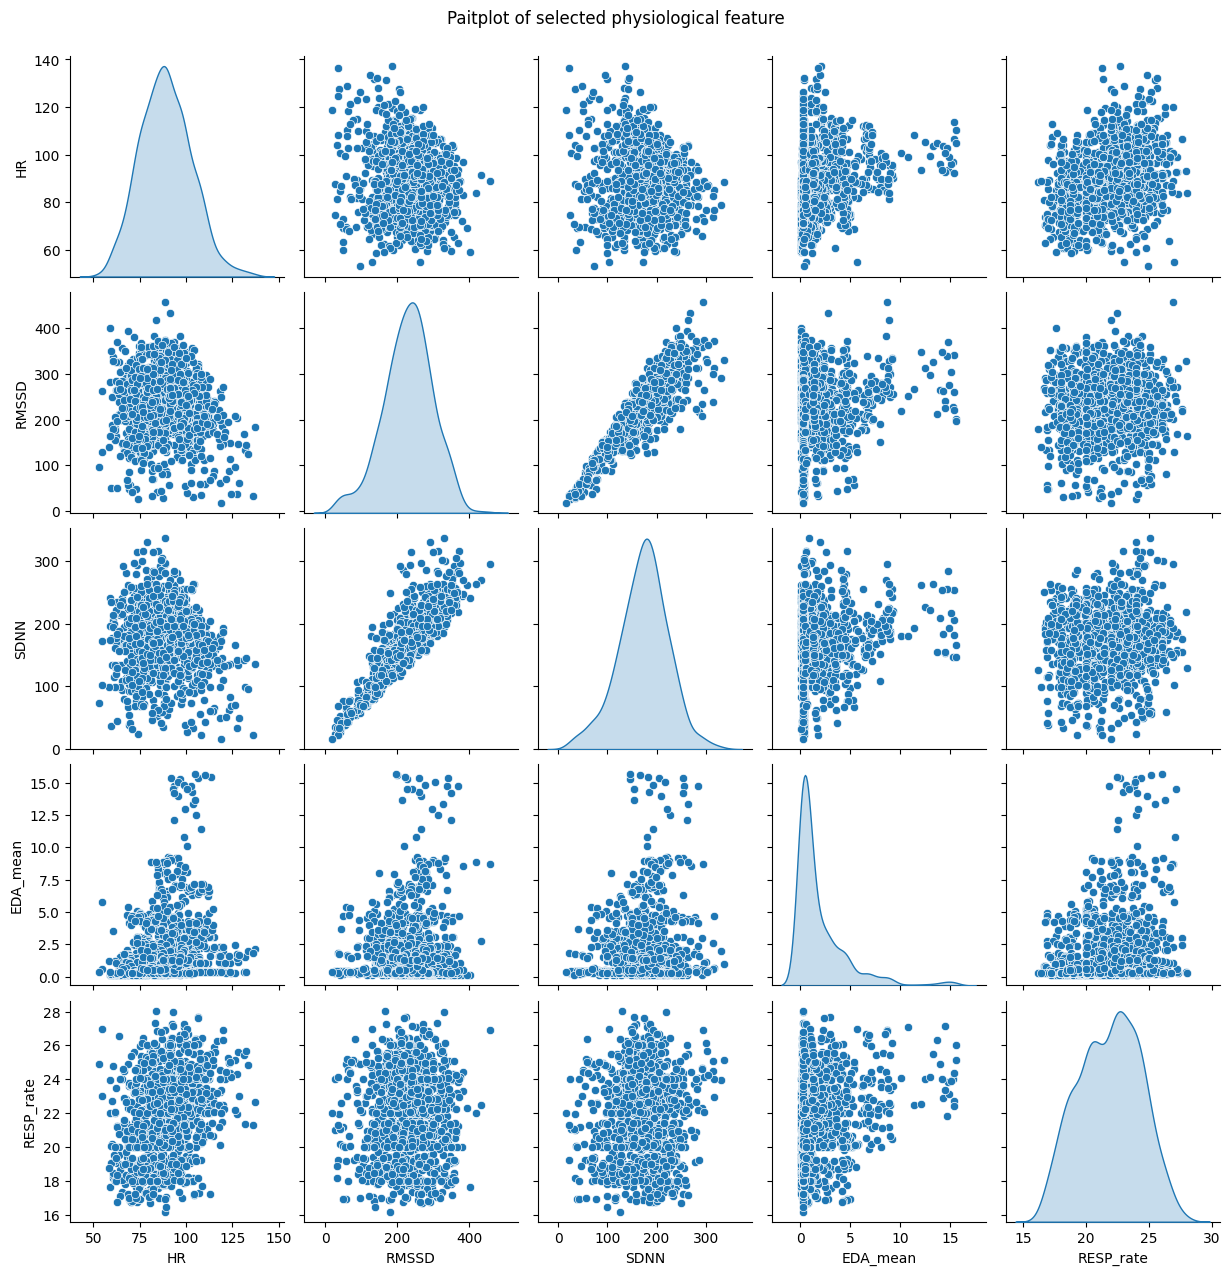

In [6]:
sns.pairplot(df_all[['HR', 'RMSSD', 'SDNN', 'EDA_mean', 'RESP_rate']], diag_kind='kde')
plt.suptitle("Paitplot of selected physiological feature", y=1.02)
plt.show

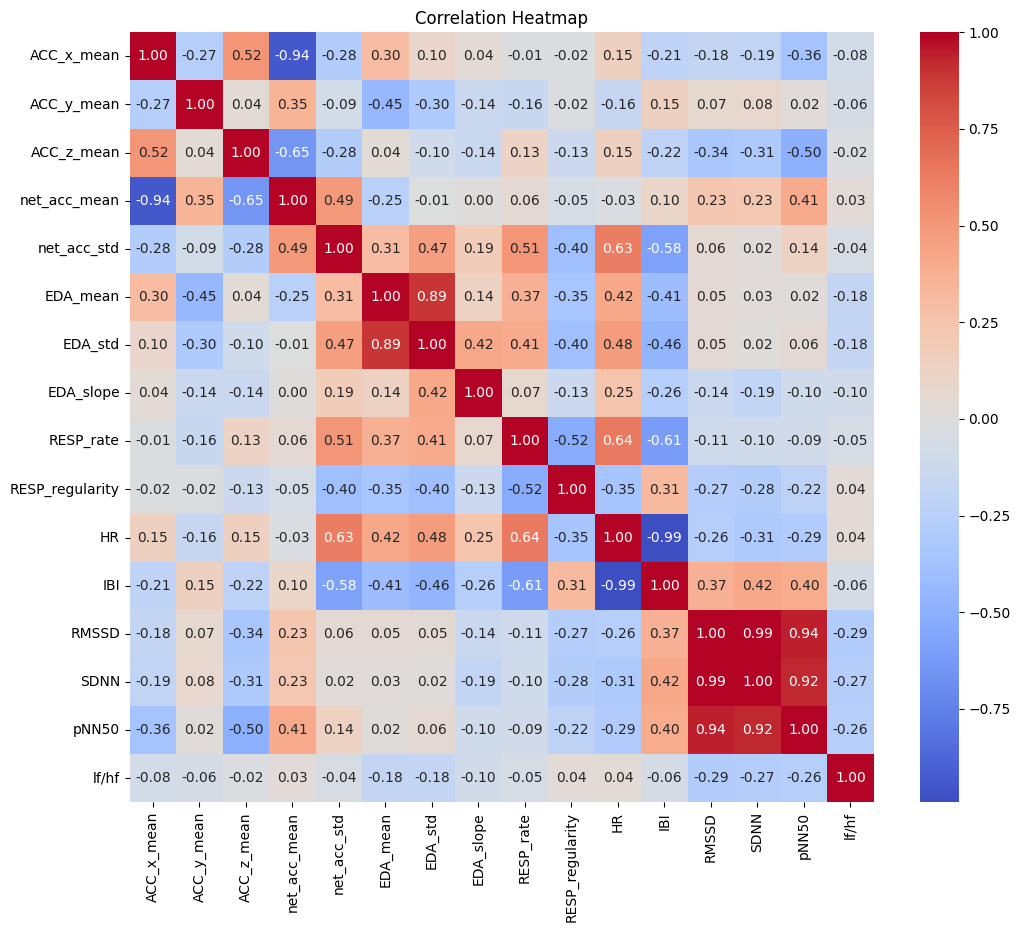

In [7]:
feature_only = df_all.drop(columns=['label', 'subject']).corr()
# Heatmap plot
plt.figure(figsize=(12, 10))
sns.heatmap(feature_only.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [8]:
corr_matrix = feature_only.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print("Features to consider dropping (correlation > 0.9):", to_drop)

Features to consider dropping (correlation > 0.9): ['net_acc_mean', 'IBI', 'SDNN', 'pNN50']


In [9]:
data = df_all.drop(columns=to_drop)

In [10]:
data

,ACC_x_mean,ACC_y_mean,ACC_z_mean,net_acc_std,EDA_mean,EDA_std,EDA_slope,RESP_rate,RESP_regularity,HR,RMSSD,lf/hf,label,subject
0,41.300000,-13.336458,-45.421875,0.782918,0.630601,0.026678,-0.000766,17.748666,1.755023,75.081294,226.949936,1.475494,1,8
1,38.507292,-16.338542,-47.057292,0.393706,0.563131,0.014406,-0.000412,21.083279,1.630067,63.966173,213.058396,5.933398,1,8
2,38.330208,-14.023958,-47.987500,0.323301,0.523506,0.009367,-0.000265,21.327375,1.591487,66.372243,134.469912,44.207315,1,8
3,38.111458,-33.287500,-9.120833,6.506794,0.520051,0.018623,0.000048,22.168906,1.352590,78.588847,159.088795,707.930928,1,8
4,36.706250,-50.160417,6.701042,0.500270,0.493109,0.007353,-0.000203,24.011434,1.809602,65.088073,199.098718,6.149627,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,60.471875,-13.932292,-6.923958,2.527826,1.406534,0.027237,-0.000335,22.272574,1.496645,92.101058,309.526872,7.660533,2,15
1146,61.415625,-13.305208,0.791667,0.713855,1.312285,0.018994,-0.000344,25.431426,2.511712,91.392583,218.926867,0.551544,2,15
1147,61.202083,-13.161458,-4.913542,0.857221,1.267309,0.024485,-0.000456,23.452967,1.622576,92.325593,254.415092,2.391374,2,15
1148,61.291667,-12.771875,-4.692708,0.661521,1.253280,0.017306,-0.000060,24.010290,1.603588,87.572573,154.660359,1.505278,2,15


In [11]:
feature = data.drop(columns=['label', 'subject'])
other = data[['label', 'subject']]

### PCA

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature)

In [16]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

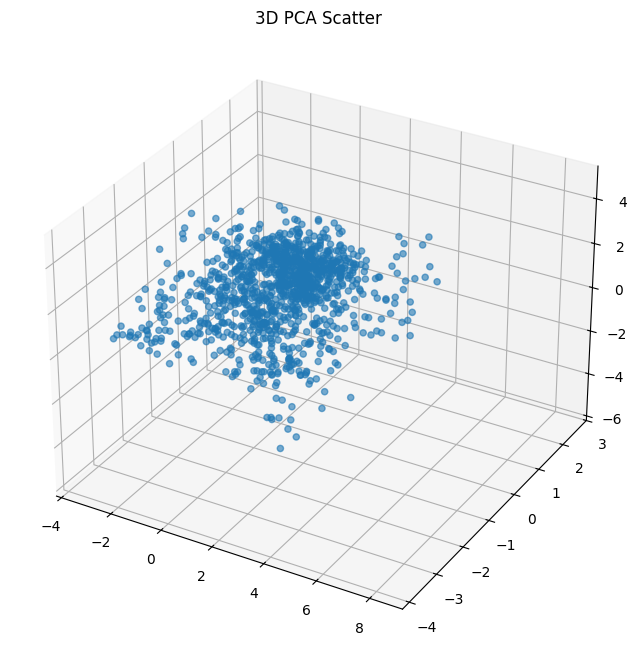

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.6)
ax.set_title("3D PCA Scatter")
plt.show()

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

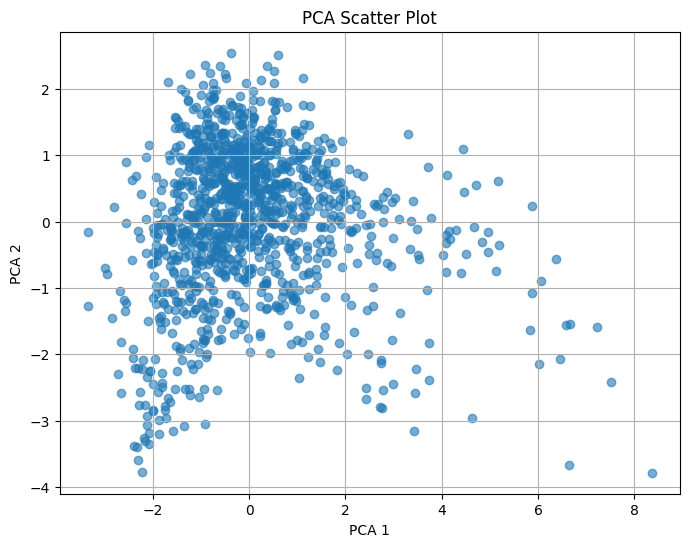

In [19]:
# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Scatter Plot")
plt.grid(True)
plt.show()

### TSNE

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


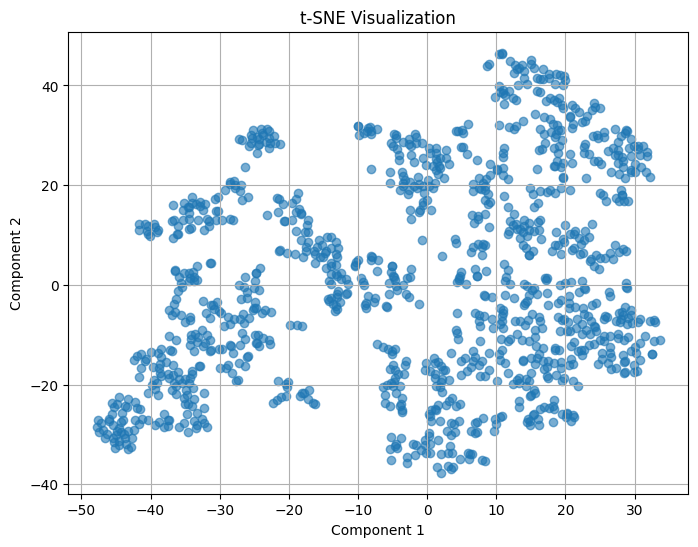

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
plt.title("t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

##### พอเห็นเป็นคลัสเตอร์ได้อยู่ แปลว่าสามารถแยกได้

### UMAP

In [23]:
pip install umap-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [25]:
import umap.umap_ as umap

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/opt/homebrew/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


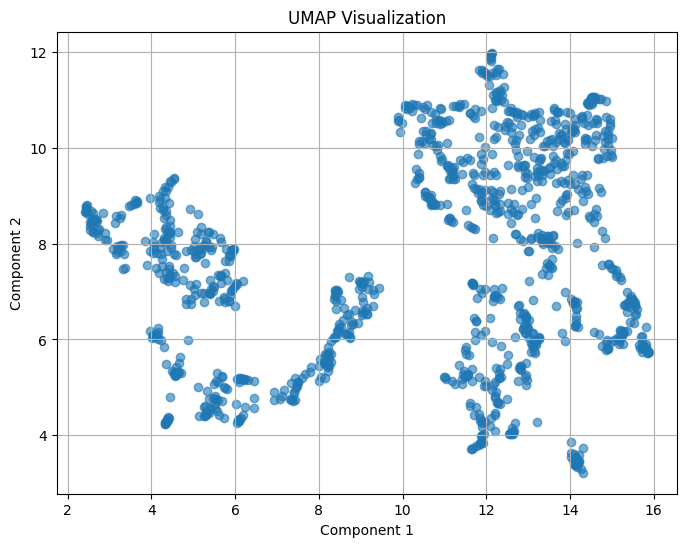

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:,0], X_umap[:,1], alpha=0.6)
plt.title("UMAP Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

### Gaussian Mixture Model cluster

In [28]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [29]:
scores = []
for n in range(2, 11):
    gmm = GaussianMixture(n_components=n, random_state=42).fit(X_umap)
    labels = gmm.predict(X_umap)
    score = silhouette_score(X_umap, labels)
    scores.append(score)

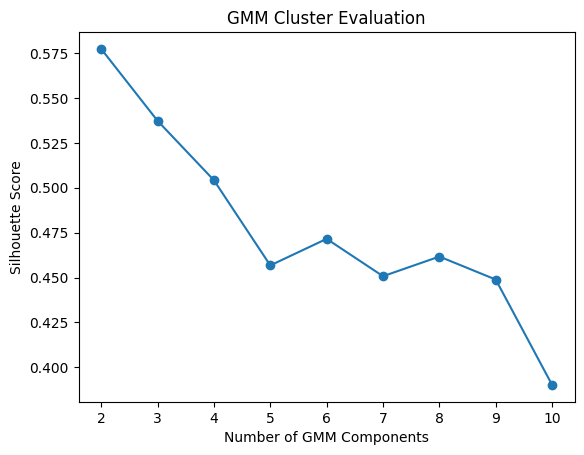

In [30]:
plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of GMM Components')
plt.ylabel('Silhouette Score')
plt.title('GMM Cluster Evaluation')
plt.show()

In [31]:
from kneed import KneeLocator

In [32]:
kneedle = KneeLocator(range(2, 11), scores, curve="convex", direction="decreasing")
print("Elbow point:", kneedle.elbow)

Elbow point: 5


In [36]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
labels = gmm.fit_predict(X_umap)

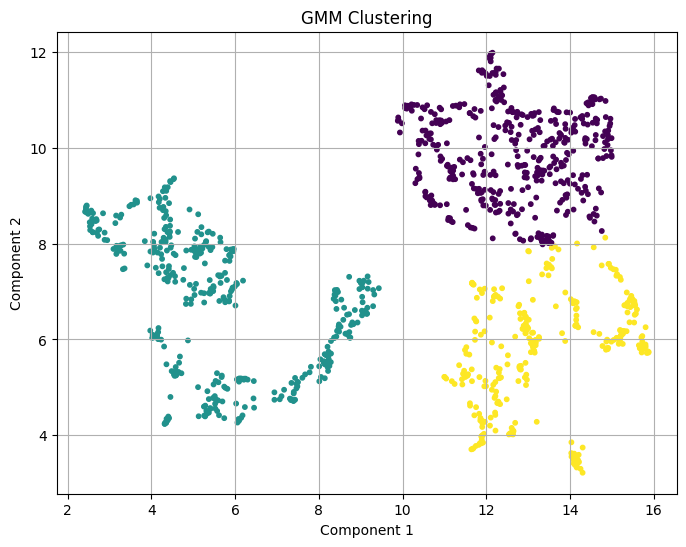

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', s=10)
plt.title("GMM Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

In [38]:
# Evaluate
sil_score = silhouette_score(X_umap, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.5373


In [39]:
df_all['cluster'] = gmm.predict(X_umap)

In [40]:
# Group by cluster
cluster_summary = df_all.groupby('cluster').mean(numeric_only=True)
print(cluster_summary.T)

cluster                   0           1           2
ACC_x_mean        44.988103  -33.530276   43.249393
ACC_y_mean        -0.310338    4.177527  -23.957592
ACC_z_mean        20.880805   -2.583712   13.533823
net_acc_mean      63.080266   64.659494   63.080679
net_acc_std        1.681248    2.665340    3.448437
EDA_mean           0.666403    1.333563    4.718931
EDA_std            0.014833    0.039784    0.102280
EDA_slope         -0.000099   -0.000080    0.000110
RESP_rate         21.231648   21.768514   22.927346
RESP_regularity    2.314639    2.141670    1.902681
HR                85.961124   87.228286   96.051578
IBI              750.675113  757.452202  679.475462
RMSSD            227.681266  232.265978  229.506588
SDNN             170.740190  174.949226  172.610940
pNN50             63.670037   72.377312   68.190890
lf/hf              7.833597   14.273385    7.722202
label              1.554023    1.585956    1.880795
subject            9.050575   10.072639    8.956954


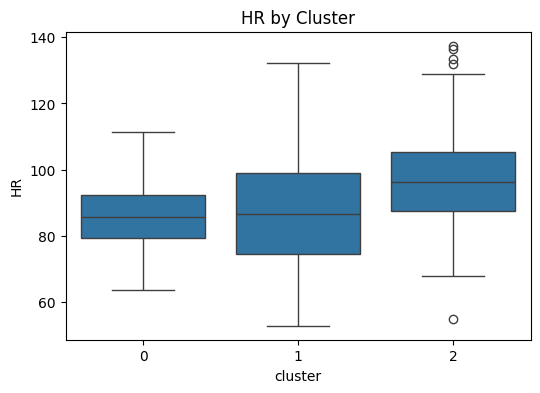

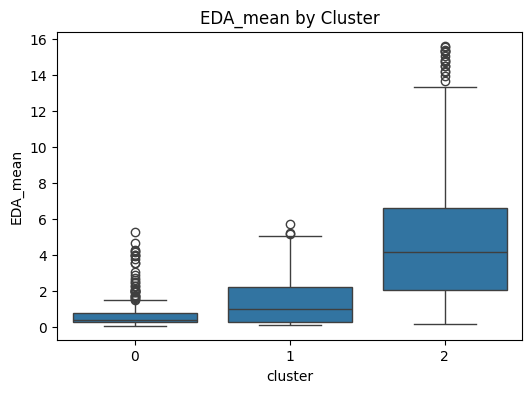

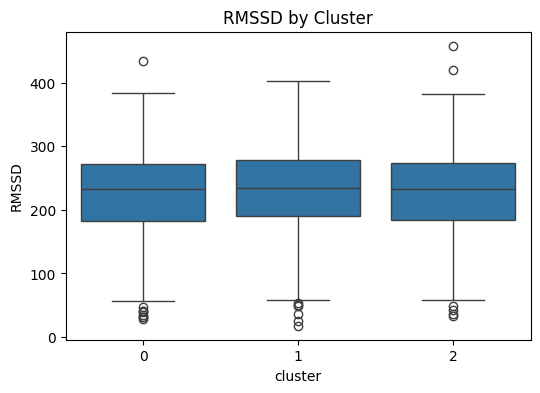

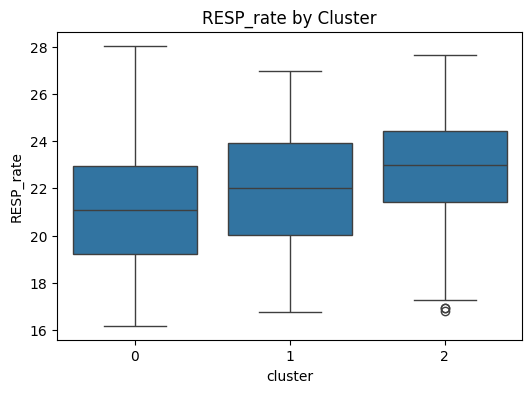

In [41]:
for feature in ['HR', 'EDA_mean', 'RMSSD', 'RESP_rate']:  # เพิ่มได้
    plt.figure(figsize=(6,4))
    sns.boxplot(x='cluster', y=feature, data=df_all)
    plt.title(f'{feature} by Cluster')
    plt.show()

In [42]:
pd.crosstab(df_all['label'], df_all['cluster'])

cluster,0,1,2
label,,,
1,298,228,76
2,33,128,186
3,104,57,40
